In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


class GridShader():
    def __init__(self, ax, first=True, **kwargs):
        self.spans = []
        self.sf = first
        self.ax = ax
        self.kw = kwargs
        self.ax.autoscale(False, axis="x")
        self.cid = self.ax.callbacks.connect('xlim_changed', self.shade)
        self.shade()
    def clear(self):
        for span in self.spans:
            try:
                span.remove()
            except:
                pass
    def shade(self, evt=None):
        self.clear()
        xticks = self.ax.get_xticks()
        xlim = self.ax.get_xlim()
        xticks = xticks[(xticks > xlim[0]) & (xticks < xlim[-1])]
        locs = np.concatenate(([[xlim[0]], xticks+0.5, [xlim[-1]]]))

        start = locs[1-int(self.sf)::2]
        end = locs[2-int(self.sf)::2]

        for s, e in zip(start, end):
            self.spans.append(self.ax.axvspan(s, e, zorder=0, **self.kw))


# Regclass

In [2]:
df1 = pd.read_csv("gamma-0.1.csv").T
df1['sample']=df1.index
df1.columns = ["Pearson correlation","Slide"]
df1['Method'] = "Regclass(gamma=0.1)"
df1

df = pd.read_csv("gamma-1.csv").T
df['sample']=df.index
df.columns = ["Pearson correlation","Slide"]
df['Method'] = "Regclass(gamma=1)"
df1 = df1.append(df)
df1

df = pd.read_csv("gamma-0.csv").T
df['sample']=df.index
df.columns = ["Pearson correlation","Slide"]
df['Method'] = "Regclass(gamma=0)"
df1 = df1.append(df)
df1

df = pd.read_csv("gamma-10.csv").T
df['sample']=df.index
df.columns = ["Pearson correlation","Slide"]
df['Method'] = "Regclass(gamma=10)"
df1 = df1.append(df)
df1

df = pd.read_csv("Hist2ST.csv").dropna()
df.columns = ["Slide", "Pearson correlation", "Method"]
df.index=df['Slide']
df1 = df1.append(df)
df1

df1["Number"] = 'Hist2ST with classification regularization'
df1

,Pearson correlation,Slide,Method,Number
A1,0.092076,A1,Regclass(gamma=0.1),Hist2ST with classification regularization
A2,0.089736,A2,Regclass(gamma=0.1),Hist2ST with classification regularization
A3,0.074547,A3,Regclass(gamma=0.1),Hist2ST with classification regularization
A4,0.063228,A4,Regclass(gamma=0.1),Hist2ST with classification regularization
A5,0.062008,A5,Regclass(gamma=0.1),Hist2ST with classification regularization
...,...,...,...,...
F2,0.072964,F2,Hist2ST,Hist2ST with classification regularization
F3,0.052135,F3,Hist2ST,Hist2ST with classification regularization
G1,0.078395,G1,Hist2ST,Hist2ST with classification regularization
G2,0.094670,G2,Hist2ST,Hist2ST with classification regularization


In [3]:
df2 = df1
df2

,Pearson correlation,Slide,Method,Number
A1,0.092076,A1,Regclass(gamma=0.1),Hist2ST with classification regularization
A2,0.089736,A2,Regclass(gamma=0.1),Hist2ST with classification regularization
A3,0.074547,A3,Regclass(gamma=0.1),Hist2ST with classification regularization
A4,0.063228,A4,Regclass(gamma=0.1),Hist2ST with classification regularization
A5,0.062008,A5,Regclass(gamma=0.1),Hist2ST with classification regularization
...,...,...,...,...
F2,0.072964,F2,Hist2ST,Hist2ST with classification regularization
F3,0.052135,F3,Hist2ST,Hist2ST with classification regularization
G1,0.078395,G1,Hist2ST,Hist2ST with classification regularization
G2,0.094670,G2,Hist2ST,Hist2ST with classification regularization


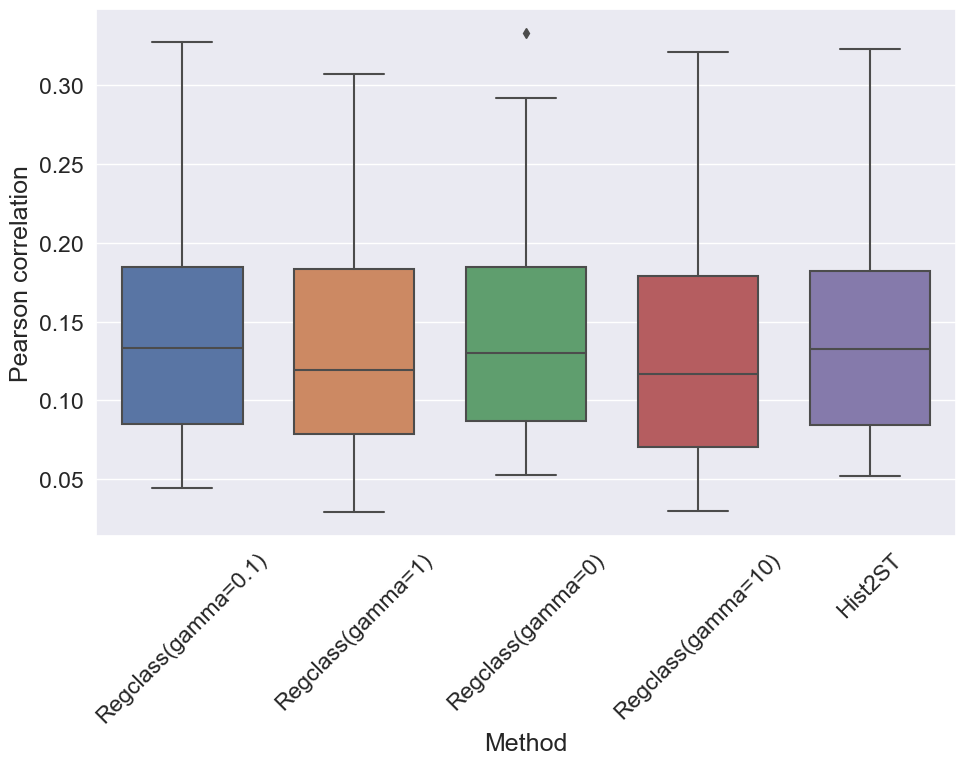

In [4]:
fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
a = sns.boxplot(x="Method", y="Pearson correlation",
               width=0.7, orient="v",
               data=df1)
# plt.xticks([])  # Command for hiding x-axis
# a.legend(loc = 'best', bbox_to_anchor=(1, 0.5))
a.set_xticklabels(a.get_xticklabels(), rotation=45)
# sns.despine(left=True)
# a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# adjust_box_widths(fig, 1)
plt.autoscale()
# gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./Regclass.png", dpi=300)
plt.show()

# Pretrained_Hist2ST

In [5]:
df1 = pd.read_csv("Pretrain_Hist2ST.csv").dropna()
df1.columns = ["Pearson correlation", "Method", "Slide"]
# df1.index=df['Slide']
df1
df1["Number"] = "Hist2ST with pretrained feature extractor"
df1

,Pearson correlation,Method,Slide,Number
0,0.088419,Hist2ST,A1,Hist2ST with pretrained feature extractor
1,0.081967,Hist2ST,A2,Hist2ST with pretrained feature extractor
2,0.077465,Hist2ST,A3,Hist2ST with pretrained feature extractor
3,0.076000,Hist2ST,A4,Hist2ST with pretrained feature extractor
4,0.058708,Hist2ST,A5,Hist2ST with pretrained feature extractor
...,...,...,...,...
135,0.099545,Swin-Transformer Backbone,G1,Hist2ST with pretrained feature extractor
136,0.105936,Swin-Transformer Backbone,G2,Hist2ST with pretrained feature extractor
137,0.120193,Swin-Transformer Backbone,G3,Hist2ST with pretrained feature extractor
138,0.102480,Swin-Transformer Backbone,Mean,Hist2ST with pretrained feature extractor


In [6]:
df2 = df2.append(df1)
df2

,Pearson correlation,Slide,Method,Number
A1,0.092076,A1,Regclass(gamma=0.1),Hist2ST with classification regularization
A2,0.089736,A2,Regclass(gamma=0.1),Hist2ST with classification regularization
A3,0.074547,A3,Regclass(gamma=0.1),Hist2ST with classification regularization
A4,0.063228,A4,Regclass(gamma=0.1),Hist2ST with classification regularization
A5,0.062008,A5,Regclass(gamma=0.1),Hist2ST with classification regularization
...,...,...,...,...
135,0.099545,G1,Swin-Transformer Backbone,Hist2ST with pretrained feature extractor
136,0.105936,G2,Swin-Transformer Backbone,Hist2ST with pretrained feature extractor
137,0.120193,G3,Swin-Transformer Backbone,Hist2ST with pretrained feature extractor
138,0.102480,Mean,Swin-Transformer Backbone,Hist2ST with pretrained feature extractor


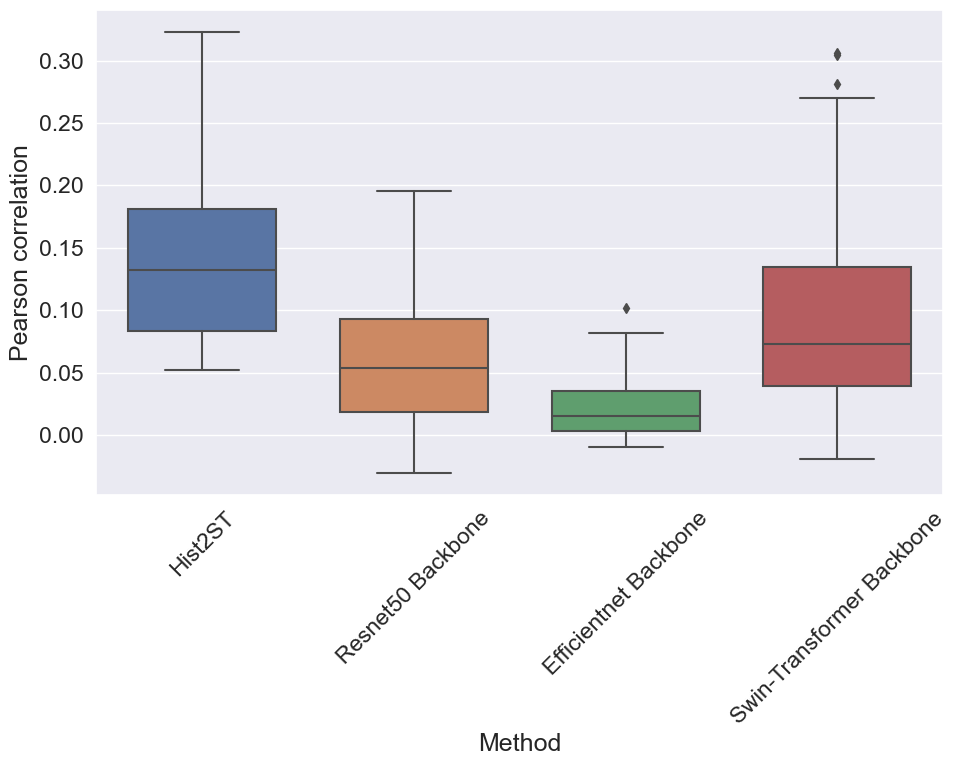

In [7]:
fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
a = sns.boxplot(x="Method", y="Pearson correlation",
               width=0.7, orient="v",
               data=df1)
# plt.xticks([])  # Command for hiding x-axis
# a.legend(loc = 'best', bbox_to_anchor=(1, 0.5))
a.set_xticklabels(a.get_xticklabels(), rotation=45)
# sns.despine(left=True)
# a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# adjust_box_widths(fig, 1)
plt.autoscale()
# gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./Pretrain_Hist2ST.png", dpi=300)
plt.show()

# Pretrained model + GAT

In [8]:
df1 = pd.read_csv("pretrained_model-efficientnet.csv").T
df1['sample']=df1.index
df1.columns = ["Pearson correlation","Slide"]
df1['Method'] = "Efficientnet+GAT"
df1

df = pd.read_csv("pretrained_model-resnet.csv").T
df['sample']=df.index
df.columns = ["Pearson correlation","Slide"]
df['Method'] = "Resnet+GAT"
df1 = df1.append(df)
df1

df = pd.read_csv("pretrained_model-swim_s.csv").T
df['sample']=df.index
df.columns = ["Pearson correlation","Slide"]
df['Method'] = "Swim_transformer+GAT"
df1 = df1.append(df)
df1

df = pd.read_csv("Hist2ST.csv").dropna()
df.columns = ["Slide", "Pearson correlation", "Method"]
df.index=df['Slide']
df1 = df1.append(df)
df1
df1["Number"] = "Pretrained feature extractor with GAT"
df1

,Pearson correlation,Slide,Method,Number
A1,-0.006515,A1,Efficientnet+GAT,Pretrained feature extractor with GAT
A2,0.008625,A2,Efficientnet+GAT,Pretrained feature extractor with GAT
A3,0.008393,A3,Efficientnet+GAT,Pretrained feature extractor with GAT
A4,0.006754,A4,Efficientnet+GAT,Pretrained feature extractor with GAT
A5,0.002748,A5,Efficientnet+GAT,Pretrained feature extractor with GAT
...,...,...,...,...
F2,0.072964,F2,Hist2ST,Pretrained feature extractor with GAT
F3,0.052135,F3,Hist2ST,Pretrained feature extractor with GAT
G1,0.078395,G1,Hist2ST,Pretrained feature extractor with GAT
G2,0.094670,G2,Hist2ST,Pretrained feature extractor with GAT


In [9]:
df2 = df2.append(df1)

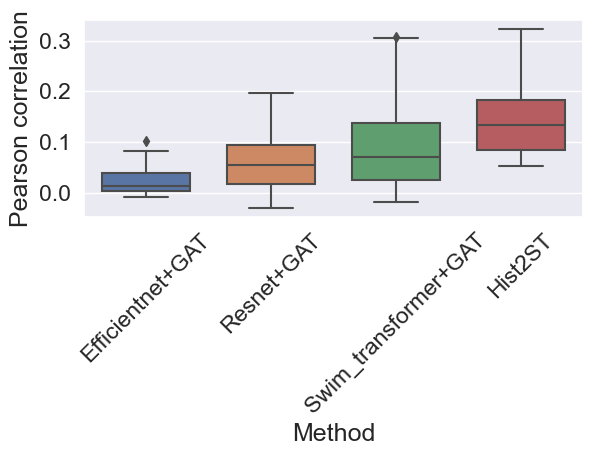

In [28]:
# fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
a = sns.boxplot(x="Method", y="Pearson correlation",
               width=0.7, orient="v",
               data=df1)
# plt.xticks([])  # Command for hiding x-axis
# a.legend(loc = 'best', bbox_to_anchor=(1, 0.5))
a.set_xticklabels(a.get_xticklabels(), rotation=45)
# sns.despine(left=True)
# a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# adjust_box_widths(fig, 1)
plt.autoscale()
# gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./Pretrain+GAT.png", dpi=300)
plt.show()

In [11]:
df2

,Pearson correlation,Slide,Method,Number
A1,0.092076,A1,Regclass(gamma=0.1),Hist2ST with classification regularization
A2,0.089736,A2,Regclass(gamma=0.1),Hist2ST with classification regularization
A3,0.074547,A3,Regclass(gamma=0.1),Hist2ST with classification regularization
A4,0.063228,A4,Regclass(gamma=0.1),Hist2ST with classification regularization
A5,0.062008,A5,Regclass(gamma=0.1),Hist2ST with classification regularization
...,...,...,...,...
F2,0.072964,F2,Hist2ST,Pretrained feature extractor with GAT
F3,0.052135,F3,Hist2ST,Pretrained feature extractor with GAT
G1,0.078395,G1,Hist2ST,Pretrained feature extractor with GAT
G2,0.094670,G2,Hist2ST,Pretrained feature extractor with GAT


# Combined boxplots

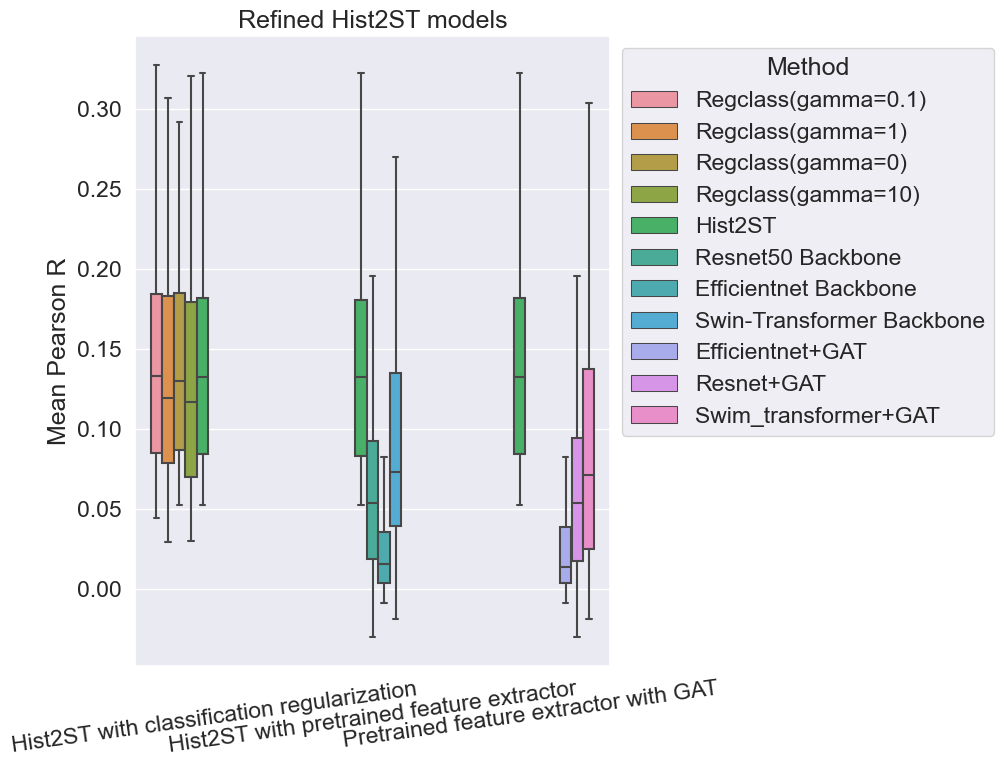

In [42]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Number", y="Pearson correlation", hue="Method", data=df2 ,showfliers=False, orient="v")   
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.ylabel("Mean Pearson R")
plt.title("Refined Hist2ST models")
ax.set_xticklabels(ax.get_xticklabels(), rotation=8)
# plt.autoscale()
plt.tight_layout()
plt.savefig("./Figure3_1.png", dpi=100)
plt.show()

/var/folders/k5/0z5qv9n14bx2r_5_dpw6nk1c0000gn/T/ipykernel_81774/163726308.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


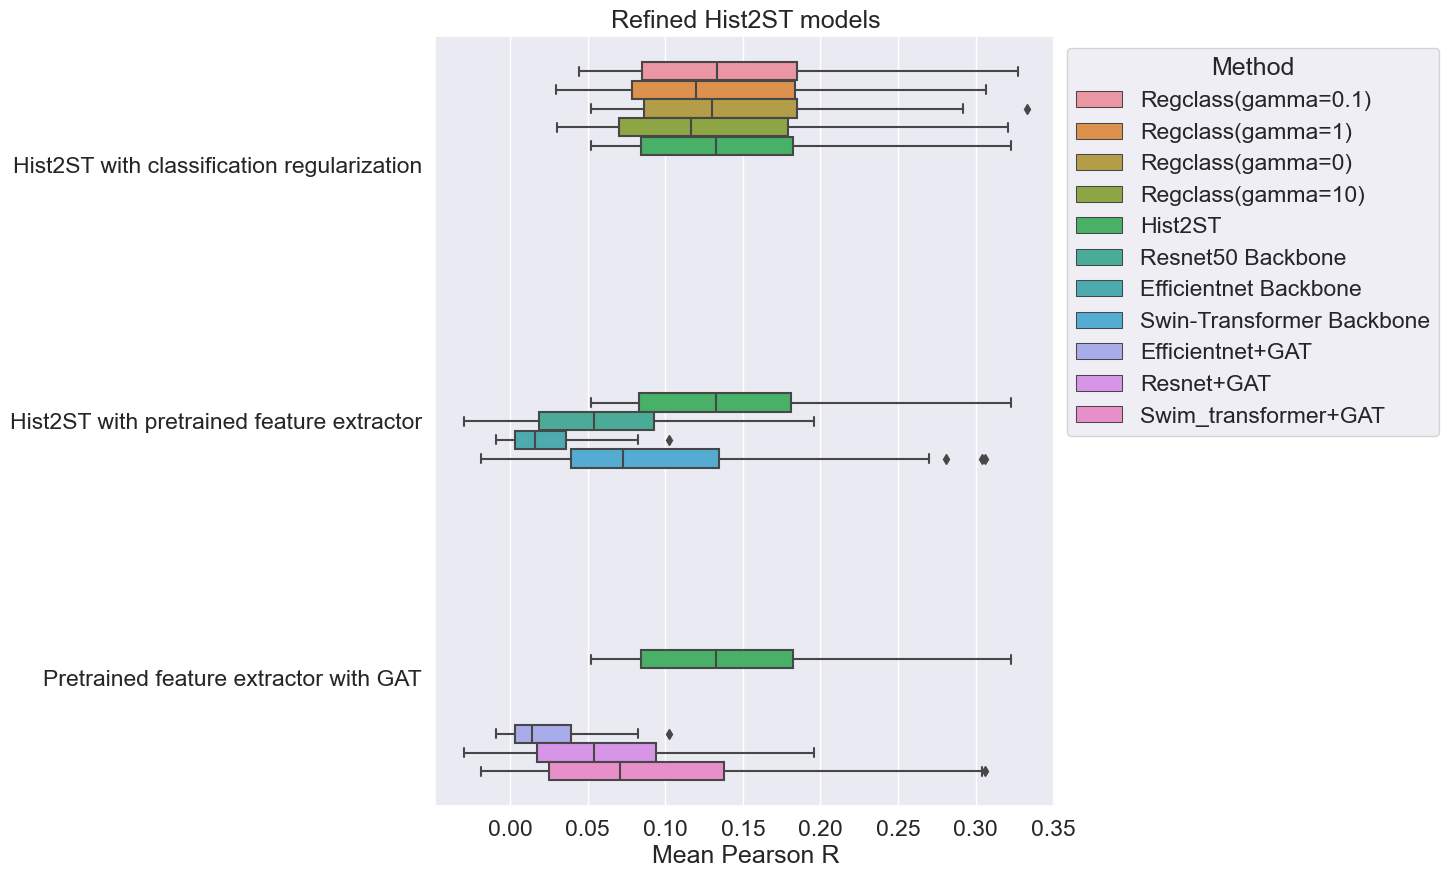

In [44]:
fig = plt.figure(figsize=(8, 10))
ax = sns.boxplot(x="Pearson correlation", y="Number", hue="Method", data=df2 ,showfliers=True, orient="h")   
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.xlabel("Mean Pearson R")
plt.title("Refined Hist2ST models")
plt.tight_layout()
plt.savefig("./Figure3_2.png", dpi=300)
plt.show()